In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc

In [11]:
# Load the .nc file
file_path_2024 = 'Hasan/ina_MIROC6_ssp245_2024_pr.nc'
file_path_2014 = 'Hasan/pr_MIROC6_1985-2014/ina_MIROC6_2014_pr.nc'
file_path_ina = 'Ina_MSWEP/merged_daily_2024.nc'
data = xr.open_dataset(file_path_2024)

# Display the data variables to determine what can be plotted
data_variables = list(data.data_vars.keys())
data_coordinates = list(data.coords.keys())

data_variables, data_coordinates

(['pr'], ['time', 'lon', 'lat'])

In [12]:
print(data_variables)

['pr']


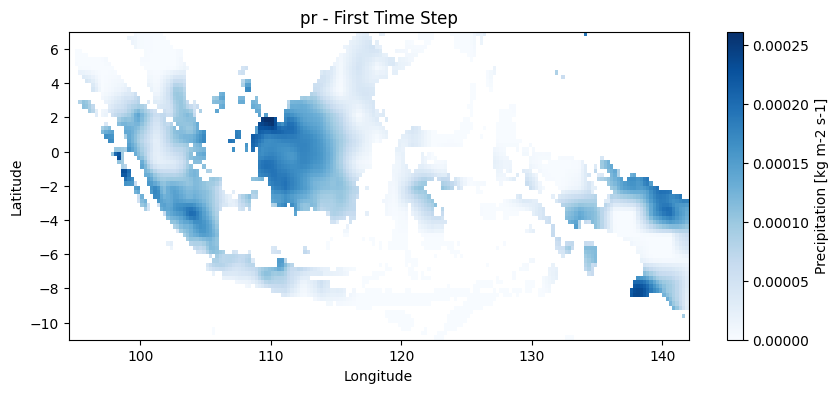

In [19]:
variable_to_plot = 'pr'  # Replace with the actual variable name from your file
if variable_to_plot in data.data_vars:
    da = data[variable_to_plot]  # Access the data array
    
    # Plot the first time step if the data is time-dependent
    if "time" in da.dims:
        da = da.isel(time=1)  # Select the first time step
    
    # Plot the data
    plt.figure(figsize=(10, 4))
    da.plot(cmap='Blues')  # You can change the colormap (cmap) as needed
    plt.title(f"{variable_to_plot} - First Time Step")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print(f"Variable '{variable_to_plot}' not found in the dataset.")

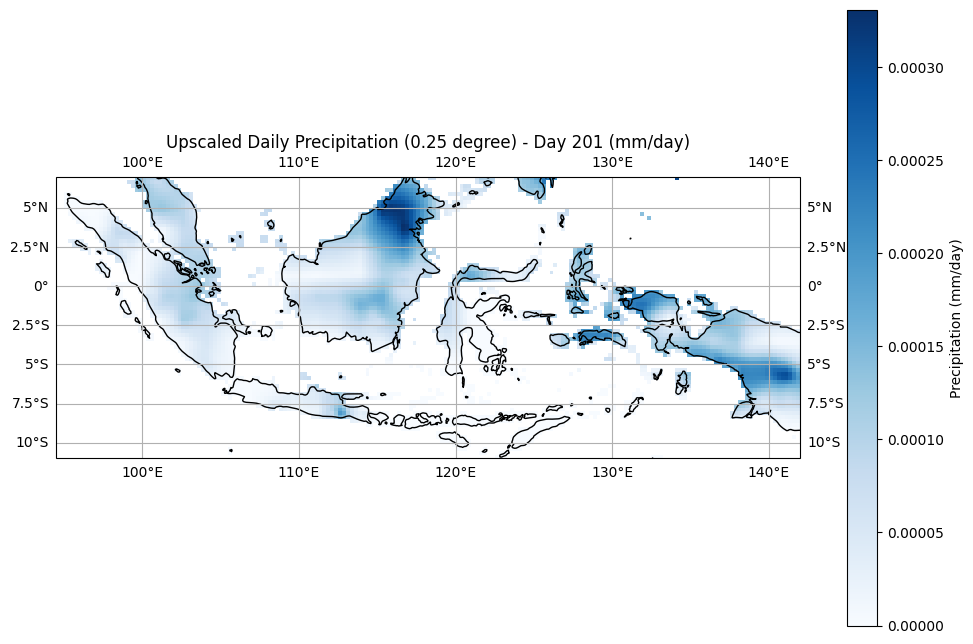

In [20]:
import cartopy.crs as ccrs

upscaled025_data = xr.open_dataset("Hasan/ina_MIROC6_ssp245_2024_pr.nc")
upscaled_variable = 'pr'
if upscaled_variable in upscaled025_data.data_vars:
    upscaled_da = upscaled025_data[upscaled_variable]
    day_to_plot = 200
    specific_day_data = upscaled_da.isel(time=day_to_plot)
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree()) 
    specific_day_data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="Blues",
        cbar_kwargs={"label": "Precipitation (mm/day)"}
    )
    ax.coastlines()
    ax.gridlines(draw_labels=True) 
    plt.title(f"Upscaled Daily Precipitation (0.25 degree) - Day {day_to_plot + 1} (mm/day)")
    #plot_output_path = "2025.PrecipitationProjection/Datasets/Ina_MSWEP/Upscaled/merged_daily_2015_upscaled025.jpg"
    #plt.savefig(plot_output_path, format="jpg", dpi=900)
    #print(f"Plot saved as {plot_output_path}")
    plt.show()
else:
    print(f"Variable '{upscaled_variable}' not found in the dataset.")